<a href="https://colab.research.google.com/github/lukigu/real-estate-prediction/blob/main/neural_network_new_gliwice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd# Assume you have a dataset with features (X) and target variable (y)
dataset = pd.read_csv("Gliwice1.csv")

In [2]:
#dataset = dataset1[0]
dataset["adj_cena"] = dataset["srednia cena"] / dataset["inflacja"] * 100
dataset["next_quarter"] = dataset["adj_cena"].shift(-3)

In [3]:
dataset.dropna(inplace=True)

In [4]:
dataset["change"] = (dataset["next_quarter"] > dataset["adj_cena"]).astype(int)

In [5]:
dataset

,rok,pkb,inflacja,liczba sprzedanych lokali,srednie zarobki w wojewodztwie,liczba studentow na 10tys,srednia cena,adj_cena,next_quarter,change
0,2010 Q1,331407.0,102.9,201,3648.67,391,190574,185203.109815,201627.184466,1
1,2010 Q2,350786.0,102.2,236,3446.68,391,191074,186960.861057,182342.256214,0
2,2010 Q3,358179.7,102.3,227,3524.17,391,193899,189539.589443,181420.749280,0
3,2010 Q4,406470.8,103.0,199,3913.18,391,207676,201627.184466,178432.122371,0
4,2011 Q1,358866.8,104.6,160,3799.45,368,190730,182342.256214,196793.834297,1
5,2011 Q2,378064.9,104.1,216,3719.88,368,188859,181420.749280,194446.064140,1
6,2011 Q3,387151.9,104.6,231,3775.52,368,186640,178432.122371,169579.403272,0
7,2011 Q4,441167.7,103.8,234,4048.62,368,204272,196793.834297,158609.615385,0
8,2012 Q1,377803.3,102.9,189,4003.08,344,200085,194446.064140,170577.329491,0
9,2012 Q2,397430.1,103.9,180,3929.91,344,176193,169579.403272,161077.457795,0


In [6]:
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neural_network import MLPClassifier

START =  20 #22take 5 y and 2 q of data
STEP = 4 #predict for 4q 1 year

def predict(train, test, predictors, target):
    # Perform predictions
    rf = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=1, max_iter=1000)
    rf.fit(train[predictors], train[target])#(X_train, y_train)
    preds = rf.predict(test[predictors])#rf.predict(X_test)
    return preds

def backtest(data, predictors, target):
    all_preds = []
    for i in range(START, data.shape[0], STEP):
        train = dataset.iloc[:i]
        test = dataset.iloc[i:(i+STEP)]
        all_preds.append(predict(train, test, predictors, target))

    preds = np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[START:][target], preds)

In [7]:
predictors = [ 'pkb', 'liczba studentow na 10tys','liczba sprzedanych lokali',
       'srednie zarobki w wojewodztwie', 'adj_cena']
target = "change"

In [8]:
preds, accuracy = backtest(dataset, predictors, target)

In [9]:
preds

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1])

In [10]:
accuracy

0.64

In [11]:
pred_match = (preds == dataset[target].iloc[START:])
pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '2015 Q1'),
  Text(1, 0, '2015 Q2'),
  Text(2, 0, '2015 Q3'),
  Text(3, 0, '2015 Q4'),
  Text(4, 0, '2016 Q1'),
  Text(5, 0, '2016 Q2'),
  Text(6, 0, '2016 Q3'),
  Text(7, 0, '2016 Q4'),
  Text(8, 0, '2017 Q1'),
  Text(9, 0, '2017 Q2'),
  Text(10, 0, '2017 Q3'),
  Text(11, 0, '2017 Q4'),
  Text(12, 0, '2018 Q1'),
  Text(13, 0, '2018 Q2'),
  Text(14, 0, '2018 Q3'),
  Text(15, 0, '2018 Q4'),
  Text(16, 0, '2019 Q1'),
  Text(17, 0, '2019 Q2'),
  Text(18, 0, '2019 Q3'),
  Text(19, 0, '2019 Q4'),
  Text(20, 0, '2020 Q1'),
  Text(21, 0, '2020 Q2'),
  Text(22, 0, '2020 Q3'),
  Text(23, 0, '2020 Q4'),
  Text(24, 0, '2021 Q1')])

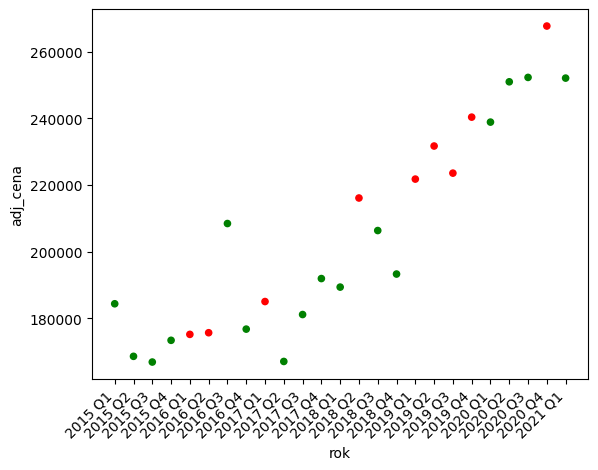

In [12]:
import matplotlib.pyplot as plt
plot_data = dataset.iloc[START:].copy()

plot_data.reset_index().plot.scatter(x="rok", y="adj_cena", color=pred_match)
plt.xticks(rotation=45, ha='right')

In [13]:
preds

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1])

In [14]:
data_list = dataset['change'].tolist()
y_true = np.array(data_list)
y_true = y_true[-len(preds):]

In [16]:
y_true

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1])

In [17]:
preds

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1])

In [18]:
from sklearn.metrics import f1_score



# Calculate F1-score
f1 = f1_score(y_true, preds)

print("F1-score:", f1)

F1-score: 0.7567567567567568


In [19]:
from sklearn.metrics import recall_score

# Calculate recall score
recall = recall_score(y_true, preds)

print("Recall:", recall)

Recall: 0.6363636363636364
